In [13]:
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
data = pd.read_csv("E:\\vgsales.1.csv")
df = pd.DataFrame(data = data);
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [15]:
df["Year"].fillna(df["Year"].mode, inplace=True)
df.isnull().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [16]:
df["Publisher"].fillna("F6", inplace=True)
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

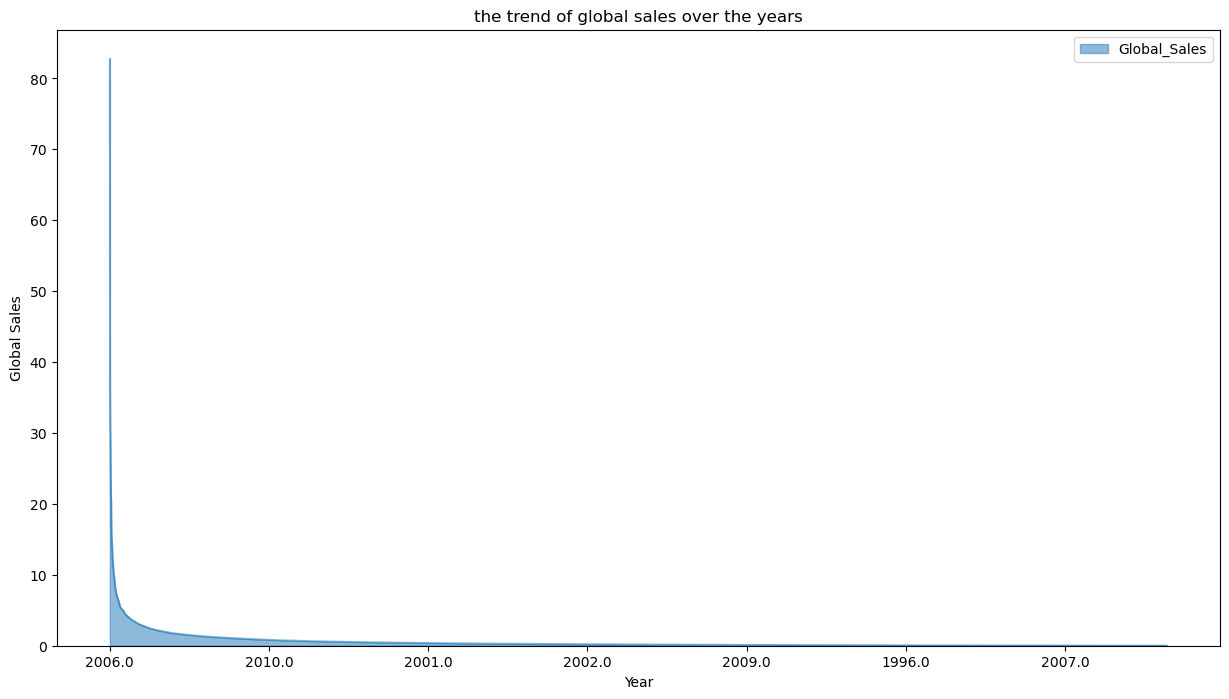

In [25]:
df1 = pd.DataFrame(data = data);
df1 = df1[['Year', 'Global_Sales']]
df1 = df1.set_index('Year')
df1.plot.area(stacked=False, figsize=(15,8))
plt.title('the trend of global sales over the years')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.show()

In [18]:
fig = px.histogram(df, x=['Global_Sales'], nbins=20, title='Distribution of Global Sales')
fig.update_layout(xaxis_title='Global Sales', yaxis_title='Frequency')
fig.show()


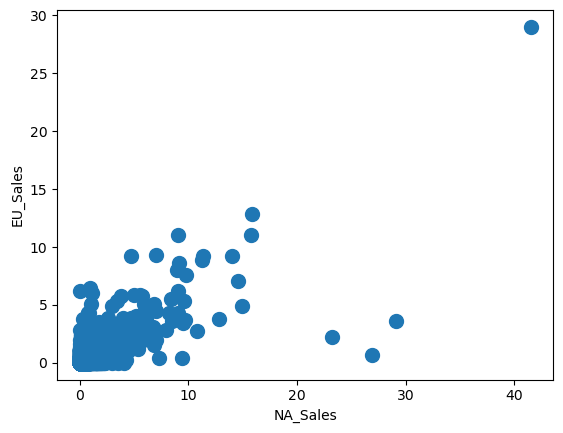

In [19]:
df = pd.DataFrame(data = data);
fig2 = df.plot.scatter(x = 'NA_Sales', y = 'EU_Sales', s = 100);

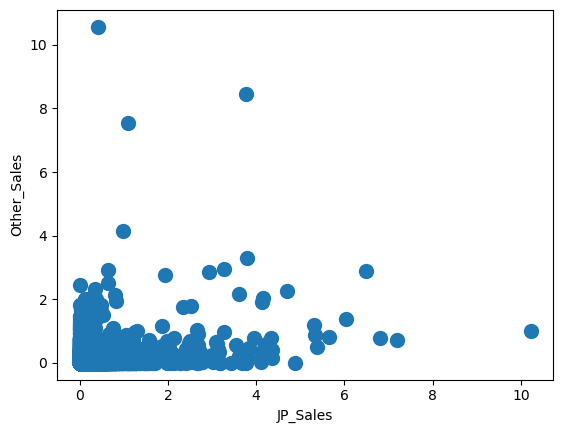

In [20]:
df = pd.DataFrame(data = data);
fig3 = df.plot.scatter(x = 'JP_Sales', y = 'Other_Sales', s = 100);

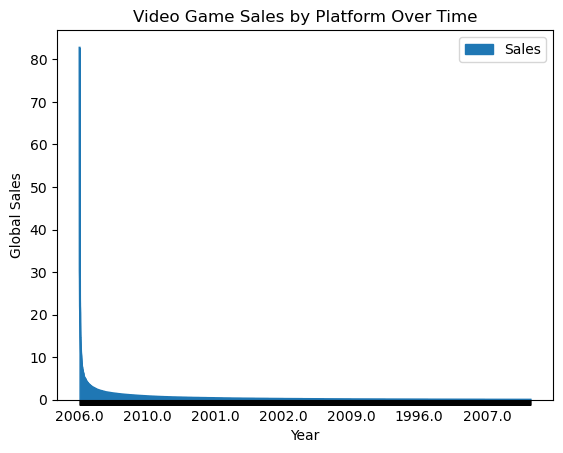

In [21]:
df2 = pd.DataFrame(data = data);
df2 = df2[['Year', 'Platform', 'Global_Sales']]
df2= df2.melt(id_vars=['Year'], value_vars=['Global_Sales'], var_name='Platform', value_name='Sales')
df2 = df2.set_index('Year')
fig6, ax = plt.subplots()
df2.groupby('Platform').plot.area(ax=ax, stacked=True)
ax.set_xticks([x for x in df.index[::2]])

plt.title('Video Game Sales by Platform Over Time')
plt.ylabel('Global Sales');

plt.show()

In [22]:
df3 = pd.DataFrame(data = data);
df3 = df3.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)[:10]
df3

Publisher
Nintendo                        1786.56
Electronic Arts                 1110.32
Activision                       727.46
Sony Computer Entertainment      607.50
Ubisoft                          474.72
Take-Two Interactive             399.54
THQ                              340.77
Konami Digital Entertainment     283.64
Sega                             272.99
Namco Bandai Games               254.09
Name: Global_Sales, dtype: float64

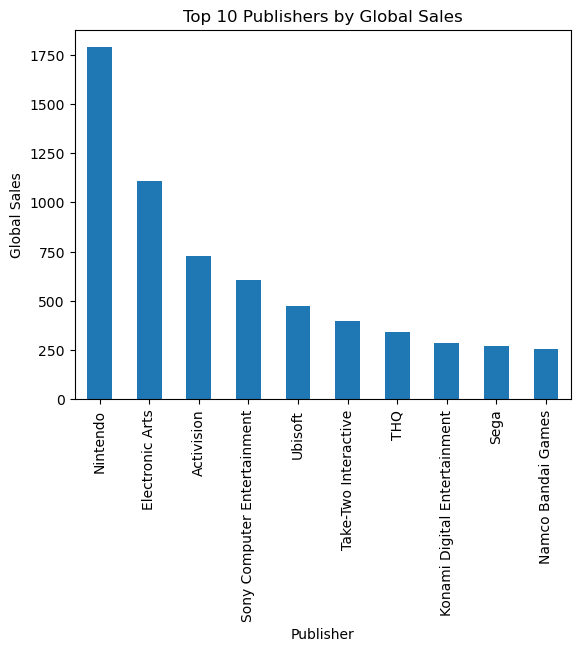

In [23]:
ax = df3.plot(kind='bar')
ax.set_xlabel('Publisher')
ax.set_ylabel('Global Sales')
ax.set_title('Top 10 Publishers by Global Sales')
plt.show()

In [24]:
fig5 = px.pie(df, values='Global_Sales', names='Genre', 
             color='Genre', title='Engine Fuel Type Distribution of Cars')
fig5.update_traces(textposition='inside', textinfo='percent+label')
fig5.update_layout(uniformtext_minsize=14, uniformtext_mode='hide')
fig5.show()